In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data =pd.read_csv('wine.csv',sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
feature =data.columns[:-1].values
label = [data.columns[-1]]
print("FEATURED LIST:",feature)
print("LABEL:",label)


FEATURED LIST: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
LABEL: ['quality']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0, 0.5, 'Count')

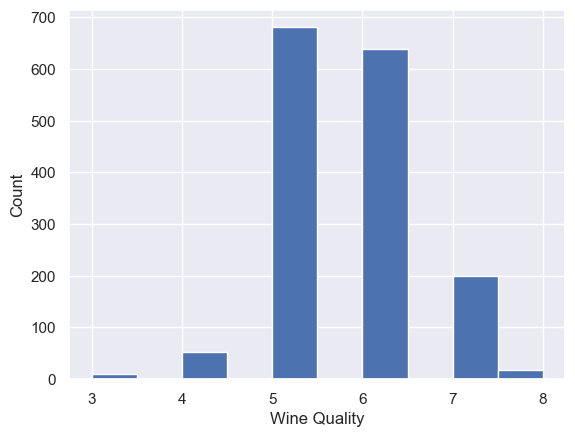

In [7]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In [8]:
def split_train_test(data,test_ratio):
    np.random.seed(1)

    shuffle=np.random.permutation(len(data))

    test_set_size = int(len(data)*test_ratio)

    test=shuffle[:test_set_size]
    train=shuffle[test_set_size:]
    return data.iloc[train],data.iloc[test]


In [9]:
train_set,test_set =split_train_test(data,0.05)


In [10]:
wine_feature=train_set.drop("quality",axis=1)
wine_label=train_set["quality"].copy()

In [11]:
wine_feature.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [12]:
wine_label.isna().sum()

0

<Axes: xlabel='fixed acidity', ylabel='density'>

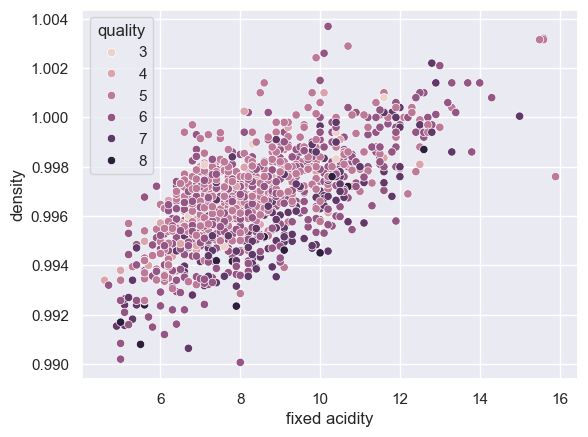

In [13]:
sns.scatterplot(x='fixed acidity',y='density',hue='quality',data=train_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

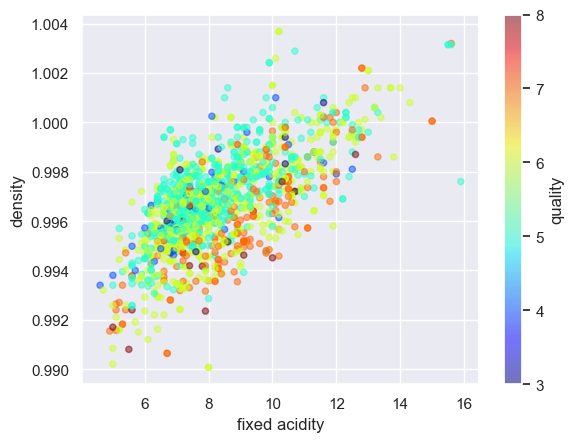

In [14]:
train_set.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.5,c='quality',cmap=plt.get_cmap("jet"))

<Axes: >

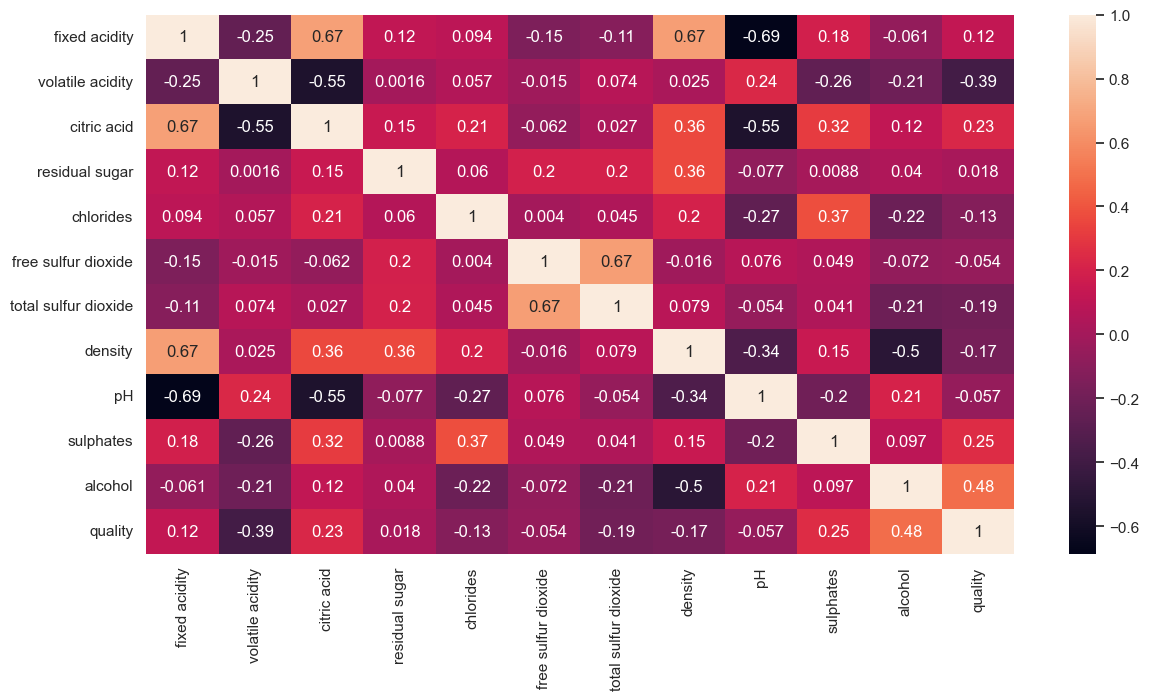

In [15]:
corr_matrix=train_set.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,annot=True)

In [16]:
# Prepare the data
X_train = train_set[feature].values
y_train = train_set[label].values.flatten()


In [17]:
# Implement the decision tree algorithm
class DecisionTreeNode:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.predicted_class = None

def calculate_gini(labels):
    classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / np.sum(counts)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def find_best_split(data, labels):
    best_gini = float('inf')
    best_feature_index = None
    best_threshold = None

    num_instances, num_features = data.shape

    for feature_index in range(num_features):
        thresholds = np.unique(data[:, feature_index])

        for threshold in thresholds:
            left_indices = np.where(data[:, feature_index] <= threshold)[0]
            right_indices = np.where(data[:, feature_index] > threshold)[0]

            left_labels = labels[left_indices]
            right_labels = labels[right_indices]

            left_gini = calculate_gini(left_labels)
            right_gini = calculate_gini(right_labels)

            weighted_gini = (len(left_indices) / num_instances) * left_gini + (len(right_indices) / num_instances) * right_gini

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

def build_decision_tree(data, labels):
    node = DecisionTreeNode(data, labels)

    if len(np.unique(labels)) == 1:
        node.predicted_class = labels[0]
        return node

    best_feature_index, best_threshold = find_best_split(data, labels)

    if best_feature_index is None or best_threshold is None:
        node.predicted_class = np.argmax(np.bincount(labels))
        return node

    node.feature_index = best_feature_index
    node.threshold = best_threshold

    left_indices = np.where(data[:, best_feature_index] <= best_threshold)[0]
    right_indices = np.where(data[:, best_feature_index] > best_threshold)[0]

    left_data = data[left_indices]
    left_labels = labels[left_indices]

    right_data = data[right_indices]
    right_labels = labels[right_indices]

    node.left = build_decision_tree(left_data, left_labels)
    node.right = build_decision_tree(right_data, right_labels)

    return node

root_node = build_decision_tree(X_train, y_train)


In [18]:
X_test = test_set[feature].values
y_test = test_set[label].values.flatten()

def predict(node, data):
    if node.predicted_class is not None:
        return node.predicted_class

    if data[node.feature_index] <= node.threshold:
        return predict(node.left, data)
    else:
        return predict(node.right, data)

y_pred = np.array([predict(root_node, sample) for sample in X_test])


In [19]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7215189873417721


In [21]:
import gradio as gr
import numpy as np

def predict_wine_quality(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                         free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol):
    sample = np.array([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                       free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol])
    prediction = predict(root_node, sample)

    if 0 <= prediction <= 2:
        quality = "Average"
    elif 3 <= prediction <= 5:
        quality = "Good"
    elif 6 <= prediction <= 8:
        quality = "Excellent"
    else:
        quality = "Unknown"

    return quality

iface = gr.Interface(
    fn=predict_wine_quality,
    inputs=[
        gr.Slider(minimum=0, maximum=15, step=0.1, label="Fixed Acidity"),
        gr.Slider(minimum=0, maximum=2, step=0.1, label="Volatile Acidity"),
        gr.Slider(minimum=0, maximum=1, step=0.01, label="Citric Acid"),
        gr.Slider(minimum=0, maximum=20, step=0.1, label="Residual Sugar"),
        gr.Slider(minimum=0, maximum=1, step=0.01, label="Chlorides"),
        gr.Slider(minimum=0, maximum=70, step=1, label="Free Sulfur Dioxide"),
        gr.Slider(minimum=0, maximum=300, step=1, label="Total Sulfur Dioxide"),
        gr.Slider(minimum=0, maximum=2, step=0.01, label="Density"),
        gr.Slider(minimum=2.5, maximum=4, step=0.01, label="pH"),
        gr.Slider(minimum=0, maximum=2, step=0.01, label="Sulphates"),
        gr.Slider(minimum=8, maximum=15, step=0.1, label="Alcohol")
    ],
    outputs=gr.Label(num_top_classes=1, label="Quality"),
    title="Wine Quality Predictor",
    description="Use sliders to input wine features and predict its quality."
)

# Launch the Gradio interface
iface.launch()


c:\Users\muhil\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
